In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
fDF=pd.read_csv("Flight_webscraping.csv")

In [3]:
fDF.head(50)

,Unnamed: 0,Airline,Flight Number,Date of Departure,From,To,Duration,Total Stops,Price
0,0,SpiceJet,SG-8263,"Thu, Feb 10",Kolkata,Port Blair,2h 00m,Non Stop,"4,421"
1,1,IndiGo,6E-2106,"Thu, Feb 10",Kolkata,Port Blair,2h 25m,Non Stop,"4,425"
2,2,Go First,G8-101,"Thu, Feb 10",Kolkata,Port Blair,2h 25m,Non Stop,"4,425"
3,3,Air India,AI-787,"Thu, Feb 10",Kolkata,Port Blair,2h 05m,Non Stop,"4,757"
4,4,Air India,AI-765/549,"Thu, Feb 10",Kolkata,Port Blair,17h 35m,1 Stop,"8,531"
5,5,Vistara,UK-747,"Thu, Feb 10",Kolkata,Port Blair,2h 20m,Non Stop,"10,059"
6,6,Air India,AI-732/416/485,"Thu, Feb 10",Kolkata,Port Blair,20h 05m,2 Stop(s),"13,360"
7,7,Air India,AI-729/890/485,"Thu, Feb 10",Kolkata,Port Blair,23h 15m,2 Stop(s),"13,493"
8,8,Air India,9I-9741/890/485,"Thu, Feb 10",Kolkata,Port Blair,27h 10m,2 Stop(s),"13,629"
9,9,Air India,9I-9745/474/485,"Thu, Feb 10",Kolkata,Port Blair,21h 30m,3 Stop(s),"13,808"


In [4]:
fDF.shape

(1951, 9)

#### checking for null values

In [5]:
fDF.isnull().sum()

Unnamed: 0           0
Airline              0
Flight Number        0
Date of Departure    0
From                 0
To                   0
Duration             0
Total Stops          0
Price                0
dtype: int64

There are no null values in dataset.

#### Checking for blank spaces, random characters in each column

In [6]:
search =[" ","-",]

for c in fDF:
    for s in search:
        print(f"{s} in {c} = ",end= " ")
        print((fDF[c] == s).sum())

  in Unnamed: 0 =  0
- in Unnamed: 0 =  0
  in Airline =  0
- in Airline =  0
  in Flight Number =  0
- in Flight Number =  0
  in Date of Departure =  0
- in Date of Departure =  3
  in From =  0
- in From =  0
  in To =  0
- in To =  0
  in Duration =  0
- in Duration =  0
  in Total Stops =  0
- in Total Stops =  0
  in Price =  0
- in Price =  0


There are Three blank spaces in Date of Departure, random characters  in columns of dataset

#### Getting the basic summary and statistical information of the data.

In [7]:
fDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1951 entries, 0 to 1950
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         1951 non-null   int64 
 1   Airline            1951 non-null   object
 2   Flight Number      1951 non-null   object
 3   Date of Departure  1951 non-null   object
 4   From               1951 non-null   object
 5   To                 1951 non-null   object
 6   Duration           1951 non-null   object
 7   Total Stops        1951 non-null   object
 8   Price              1951 non-null   object
dtypes: int64(1), object(8)
memory usage: 137.3+ KB


In [8]:
fDF.nunique() #the number of unique values in each column

Unnamed: 0           1951
Airline                10
Flight Number        1030
Date of Departure      49
From                   23
To                     23
Duration              425
Total Stops             7
Price                 451
dtype: int64

####  Data Cleaning

In [9]:
### filling the blank value in the column Date of Departure
fDF['Date of Departure'] = fDF['Date of Departure'].str.replace('-', 'Sat, Apr 9 ',regex = True)

In [10]:
fDF['Date of Departure'].unique()

array(['Thu, Feb 10', 'Mon, Mar 28', 'Sat, Mar 19', 'Thu, Mar 24',
       'Sun, Apr 3', 'Thu, Mar 10', 'Fri, Mar 25', 'Wed, Feb 9',
       'Fri, Mar 4', 'Sun, Feb 27', 'Fri, Feb 11', 'Sun, Mar 13',
       'Sun, Mar 20', 'Wed, Mar 2', 'Sun, Apr 24', 'Tue, Feb 8',
       'Sun, Apr 17', 'Sun, Mar 27', 'Mon, Apr 4', 'Fri, Feb 25',
       'Sat, Feb 26', 'Sat, Mar 26', 'Wed, Mar 16', 'Mon, Feb 14',
       'Mon, Feb 21', 'Sat, Feb 12', 'Sat, Mar 12', 'Fri, Apr 1',
       'Tue, Mar 1', 'Sat, Apr 9 ', 'Sun, Mar 6', 'Thu, Mar 3',
       'Sat, Apr 9', 'Tue, Feb 1', 'Sat, Feb 19', 'Tue, Mar 8',
       'Thu, Mar 17', 'Sun, Feb 20', 'Sun, Feb 13', 'Wed, Mar 9',
       'Thu, Mar 31', 'Tue, Mar 22', 'Mon, Feb 7', 'Sat, Feb 5',
       'Sun, Feb 6', 'Fri, Mar 11', 'Tue, Feb 15', 'Thu, Feb 24',
       'Jan 29'], dtype=object)

In [11]:
fDF['Total Stops'].value_counts()

1 Stop       583
Non Stop     569
1-stop       551
non-stop     132
2+-stop       95
2 Stop(s)     19
3 Stop(s)      2
Name: Total Stops, dtype: int64

In [12]:
fDF['Total Stops'] = fDF['Total Stops'].replace({'1 Stop':'1-stop','Non Stop':'non-stop','3 Stop(s)':'2+-stop'})

In [13]:
fDF['Total Stops'].value_counts()

1-stop       1134
non-stop      701
2+-stop        97
2 Stop(s)      19
Name: Total Stops, dtype: int64

In [14]:
fDF['Airline'].value_counts()

IndiGo       624
Air India    494
Vistara      253
Go First     156
SpiceJet     134
Indigo       126
Air Asia     102
GO FIRST      53
AirAsia        7
FlyBig         2
Name: Airline, dtype: int64

In [15]:
fDF['Airline'] = fDF['Airline'].replace({'Indigo':'IndiGo','AirAsia':'Air Asia','GO FIRST':'Go First'})

In [16]:
fDF['Airline'].value_counts()

IndiGo       750
Air India    494
Vistara      253
Go First     209
SpiceJet     134
Air Asia     109
FlyBig         2
Name: Airline, dtype: int64

In [17]:
fDF['From'].value_counts()

Delhi         429
Mumbai        427
Kolkata       312
New Delhi     150
Bangalore     140
Hyderabad     133
Goa            60
Chennai        40
Guwahati       40
Pune           30
Port Blair     30
Lucknow        20
Dehradun       20
Patna          20
Jaipur         20
Coimbatore     10
Ahmedabad      10
Bagdogra       10
Varanasi       10
Kochi          10
Vijayawada     10
Chandigarh     10
Tirupati       10
Name: From, dtype: int64

In [18]:
fDF['From'] = fDF['From'].replace({'Delhi':'New Delhi'})

In [19]:
fDF['From'].value_counts()

New Delhi     579
Mumbai        427
Kolkata       312
Bangalore     140
Hyderabad     133
Goa            60
Guwahati       40
Chennai        40
Pune           30
Port Blair     30
Lucknow        20
Dehradun       20
Patna          20
Jaipur         20
Ahmedabad      10
Coimbatore     10
Varanasi       10
Bagdogra       10
Vijayawada     10
Kochi          10
Chandigarh     10
Tirupati       10
Name: From, dtype: int64

In [20]:
fDF['To'].value_counts()

Bangalore     346
Kolkata       301
Mumbai        253
Goa           207
Delhi         182
New Delhi     150
Hyderabad     140
Pune           60
Patna          54
Chennai        40
Guwahati       40
Port Blair     30
Lucknow        20
Bagdogra       20
Dehradun       20
Jaipur         20
Coimbatore     10
Ahmedabad      10
Varanasi       10
Kochi          10
Vijayawada     10
Chandigarh     10
Tirupati        8
Name: To, dtype: int64

In [21]:
fDF['To'] = fDF['To'].replace({'Delhi':'New Delhi'})

In [22]:
fDF['To'].value_counts()

Bangalore     346
New Delhi     332
Kolkata       301
Mumbai        253
Goa           207
Hyderabad     140
Pune           60
Patna          54
Guwahati       40
Chennai        40
Port Blair     30
Lucknow        20
Bagdogra       20
Dehradun       20
Jaipur         20
Coimbatore     10
Ahmedabad      10
Varanasi       10
Vijayawada     10
Kochi          10
Chandigarh     10
Tirupati        8
Name: To, dtype: int64

In [23]:
fDF['Date of Departure'].value_counts()

Jan 29         778
Wed, Feb 9     110
Sun, Mar 20     60
Sat, Feb 26     60
Tue, Feb 8      50
Thu, Mar 10     50
Wed, Mar 16     40
Sun, Feb 27     40
Fri, Feb 25     40
Fri, Mar 25     40
Fri, Feb 11     40
Wed, Mar 2      30
Mon, Mar 28     30
Thu, Mar 24     30
Fri, Mar 4      30
Sun, Apr 24     30
Sun, Apr 3      30
Mon, Feb 14     30
Sat, Mar 19     30
Tue, Feb 15     20
Sat, Mar 12     20
Tue, Feb 1      20
Thu, Mar 3      20
Thu, Feb 10     20
Sat, Feb 12     20
Sat, Mar 26     20
Sat, Apr 9      20
Tue, Mar 1      20
Sat, Feb 19     20
Sun, Mar 13     20
Fri, Mar 11     10
Mon, Apr 4      10
Sun, Feb 6      10
Thu, Mar 31     10
Sun, Feb 20     10
Sun, Feb 13     10
Thu, Feb 24     10
Sat, Feb 5      10
Sun, Mar 27     10
Fri, Apr 1      10
Tue, Mar 8      10
Sun, Apr 17     10
Sun, Mar 6      10
Tue, Mar 22     10
Thu, Mar 17     10
Mon, Feb 21     10
Mon, Feb 7      10
Wed, Mar 9      10
Sat, Apr 9       3
Name: Date of Departure, dtype: int64

In [24]:
fDF['Date of Departure'] = fDF['Date of Departure'].replace({'Jan 29':'Sat, Jan 29'})

In [27]:
fDF['Date of Departure'].value_counts()

Sat, Jan 29    778
Wed, Feb 9     110
Sat, Feb 26     60
Sun, Mar 20     60
Tue, Feb 8      50
Thu, Mar 10     50
Fri, Feb 25     40
Fri, Mar 25     40
Fri, Feb 11     40
Sun, Feb 27     40
Wed, Mar 16     40
Mon, Mar 28     30
Wed, Mar 2      30
Thu, Mar 24     30
Mon, Feb 14     30
Fri, Mar 4      30
Sun, Apr 3      30
Sat, Mar 19     30
Sun, Apr 24     30
Tue, Feb 15     20
Sat, Feb 19     20
Sat, Apr 9      20
Tue, Mar 1      20
Sun, Mar 13     20
Sat, Mar 12     20
Thu, Feb 10     20
Tue, Feb 1      20
Sat, Mar 26     20
Sat, Feb 12     20
Thu, Mar 3      20
Sun, Mar 6      10
Wed, Mar 9      10
Thu, Mar 31     10
Thu, Feb 24     10
Mon, Feb 7      10
Thu, Mar 17     10
Fri, Apr 1      10
Mon, Apr 4      10
Tue, Mar 8      10
Sun, Apr 17     10
Fri, Mar 11     10
Mon, Feb 21     10
Sun, Feb 13     10
Tue, Mar 22     10
Sun, Feb 20     10
Sun, Mar 27     10
Sat, Feb 5      10
Sun, Feb 6      10
Sat, Apr 9       3
Name: Date of Departure, dtype: int64

#### Converting values in Column 'Price' to int64 datatype

Converting Pandas column into a list, removing the ',' from the values, reattaching to Original Pandas Dataframe and then converting to int64 datatype

In [25]:
price = fDF['Price'].tolist() 

In [26]:
Price = []
for p in price:
    Price.append(p.replace(",",""))

In [27]:
df = pd.DataFrame({'Price':Price})

In [28]:
df.index = fDF.index

In [29]:
fDF['Price'] = df['Price']

In [30]:
fDF['Price'] = fDF['Price'].astype('int64')

#### Dropping column Unnamed: 0 since it is not required for building the predictive model

In [31]:
fDF.drop(columns=['Unnamed: 0'],inplace = True)

In [32]:
fDF.reset_index(drop=True,inplace = True)

### Feature Engineering

##### Creating New columns "Day", "Date","Month" from Column 'Date of Departure'

In [33]:
DateDept = fDF['Date of Departure'].tolist() 

In [34]:
Day=[]
date = []
Month = []
Date = []

In [35]:
for d in DateDept:
    Day.append(d.split(",")[0])
    date.append(d.split(",")[1])

In [36]:
for d in date:
    Date.append(d.split(" ")[2])
    Month.append(d.split(" ")[1])

In [37]:
df2 = pd.DataFrame({'Day':Day, 'Date':Date,'Month': Month})

In [38]:
df2.index = fDF.index

In [39]:
fDF[['Day','Date','Month']] = df2[['Day','Date','Month']]

In [40]:
fDF['Duration'].unique()

array(['2h 00m', '2h 25m', '2h 05m', '17h 35m', '2h 20m', '20h 05m',
       '23h 15m', '27h 10m', '21h 30m', '4h 50m', '5h 25m', '6h 20m',
       '7h 00m', '7h 35m', '8h 35m', '8h 50m', '10h 50m', '27h 15m',
       '7h 15m', '2h 50m', '2h 35m', '2h 45m', '2h 55m', '3h 00m',
       '3h 10m', '2h 30m', '6h 50m', '7h 05m', '8h 10m', '8h 15m',
       '10h 05m', '1h 35m', '1h 15m', '1h 25m', '4h 15m', '4h 35m',
       '5h 20m', '6h 00m', '9h 15m', '6h 55m', '7h 45m', '9h 40m',
       '11h 10m', '5h 55m', '12h 40m', '7h 30m', '2h 40m', '8h 40m',
       '5h 45m', '15h 25m', '7h 10m', '9h 25m', '9h 30m', '11h 30m',
       '11h 35m', '14h 20m', '2h 10m', '2h 15m', '5h 05m', '6h 10m',
       '8h 55m', '9h 00m', '9h 05m', '1h 30m', '1h 45m', '1h 10m',
       '5h 40m', '5h 50m', '6h 25m', '7h 55m', '8h 25m', '11h 00m',
       '6h 35m', '6h 15m', '6h 30m', '9h 10m', '9h 45m', '4h 55m',
       '9h 35m', '15h 10m', '15h 35m', '5h 00m', '11h 45m', '15h 05m',
       '28h 05m', '18h 05m', '19h 40m', '5h

It is observed that Duration values are the difference between Dep_Time and Arrival_Time

#### Converting the values in Duration column to minutes

In [41]:
fDF['Duration']

0        2h 00m
1        2h 25m
2        2h 25m
3        2h 05m
4       17h 35m
         ...   
1946    10h 30m
1947    23h 40m
1948    28h 50m
1949    13h 55m
1950    11h 10m
Name: Duration, Length: 1951, dtype: object

The values are represented in hours('h') and minutes('m'). For understanding the relationship between price(which contains integer values) and Duration, the values of Duration column must be converted into minutes of integer value type.

The 'h' component of each value will be multiplied by 60, and then added to 'm' component.

Firstly, 'h' is replaced by string '*60', the empty space in between is replaced by string '+' and 'm' character at the end is removed.

Since each value is string type, eval function can be used.

Finally eval() function will be applied to all the values which will treat each value as a mathematical operation statement.

ie. (x*60+y) where x is the number attached to 'h' and y is the number attached to 'm'

In [42]:
duration = fDF['Duration'].tolist() #creating a list with values from colum 'Duration'

In [43]:
duration

['2h 00m',
 '2h 25m',
 '2h 25m',
 '2h 05m',
 '17h 35m',
 '2h 20m',
 '20h 05m',
 '23h 15m',
 '27h 10m',
 '21h 30m',
 '4h 50m',
 '5h 25m',
 '6h 20m',
 '7h 00m',
 '7h 35m',
 '8h 35m',
 '8h 50m',
 '10h 50m',
 '27h 15m',
 '7h 15m',
 '2h 50m',
 '2h 50m',
 '2h 50m',
 '2h 35m',
 '2h 45m',
 '2h 50m',
 '2h 55m',
 '3h 00m',
 '3h 10m',
 '2h 50m',
 '2h 30m',
 '2h 25m',
 '2h 30m',
 '2h 30m',
 '5h 25m',
 '6h 50m',
 '7h 05m',
 '8h 10m',
 '8h 15m',
 '10h 05m',
 '1h 35m',
 '1h 15m',
 '1h 15m',
 '1h 25m',
 '4h 15m',
 '4h 35m',
 '5h 20m',
 '6h 00m',
 '7h 35m',
 '9h 15m',
 '6h 55m',
 '7h 45m',
 '9h 40m',
 '11h 10m',
 '4h 50m',
 '7h 05m',
 '8h 10m',
 '5h 55m',
 '12h 40m',
 '7h 30m',
 '2h 20m',
 '2h 20m',
 '2h 20m',
 '2h 25m',
 '2h 25m',
 '2h 25m',
 '2h 40m',
 '6h 00m',
 '8h 15m',
 '8h 40m',
 '5h 45m',
 '15h 25m',
 '5h 45m',
 '7h 10m',
 '9h 25m',
 '9h 30m',
 '11h 30m',
 '11h 35m',
 '12h 40m',
 '14h 20m',
 '2h 05m',
 '2h 10m',
 '2h 15m',
 '5h 05m',
 '5h 55m',
 '6h 10m',
 '8h 55m',
 '9h 00m',
 '9h 05m',
 '2h 1

In [44]:
""" replacing 'h' with *60, whitespace with "+",removing "m" and 
removing leading zeroes from the decimal integer literals since they aren't allowed in python """

for i in range(0,len(duration)):
    duration[i] = duration[i].replace("h","*60").replace("00","0").replace("01","1").replace("02","2").replace("03","3").replace("04","4").replace("05","5").replace("06","6").replace("07","7").replace("08","8").replace("09","9").replace(" ","+").replace("m","").replace("1.0*60+","1*60") 


In [45]:
duration

['2*60+0',
 '2*60+25',
 '2*60+25',
 '2*60+5',
 '17*60+35',
 '2*60+20',
 '20*60+5',
 '23*60+15',
 '27*60+10',
 '21*60+30',
 '4*60+50',
 '5*60+25',
 '6*60+20',
 '7*60+0',
 '7*60+35',
 '8*60+35',
 '8*60+50',
 '10*60+50',
 '27*60+15',
 '7*60+15',
 '2*60+50',
 '2*60+50',
 '2*60+50',
 '2*60+35',
 '2*60+45',
 '2*60+50',
 '2*60+55',
 '3*60+0',
 '3*60+10',
 '2*60+50',
 '2*60+30',
 '2*60+25',
 '2*60+30',
 '2*60+30',
 '5*60+25',
 '6*60+50',
 '7*60+5',
 '8*60+10',
 '8*60+15',
 '10*60+5',
 '1*60+35',
 '1*60+15',
 '1*60+15',
 '1*60+25',
 '4*60+15',
 '4*60+35',
 '5*60+20',
 '6*60+0',
 '7*60+35',
 '9*60+15',
 '6*60+55',
 '7*60+45',
 '9*60+40',
 '11*60+10',
 '4*60+50',
 '7*60+5',
 '8*60+10',
 '5*60+55',
 '12*60+40',
 '7*60+30',
 '2*60+20',
 '2*60+20',
 '2*60+20',
 '2*60+25',
 '2*60+25',
 '2*60+25',
 '2*60+40',
 '6*60+0',
 '8*60+15',
 '8*60+40',
 '5*60+45',
 '15*60+25',
 '5*60+45',
 '7*60+10',
 '9*60+25',
 '9*60+30',
 '11*60+30',
 '11*60+35',
 '12*60+40',
 '14*60+20',
 '2*60+5',
 '2*60+10',
 '2*60+15',


In [46]:
for i in range(0,len(duration)):
    duration[i] = eval(duration[i])
    

In [47]:
len(duration)

1951

##### Adding Duration(mins) column to fDF dataframe.

In [48]:
dur_df = pd.DataFrame({"Duration(mins)":duration})

In [49]:
dur_df.index = fDF.index

In [50]:
fDF['Duration(mins)'] = dur_df['Duration(mins)']

In [51]:
fDF

,Airline,Flight Number,Date of Departure,From,To,Duration,Total Stops,Price,Day,Date,Month,Duration(mins)
0,SpiceJet,SG-8263,"Thu, Feb 10",Kolkata,Port Blair,2h 00m,non-stop,4421,Thu,10,Feb,120
1,IndiGo,6E-2106,"Thu, Feb 10",Kolkata,Port Blair,2h 25m,non-stop,4425,Thu,10,Feb,145
2,Go First,G8-101,"Thu, Feb 10",Kolkata,Port Blair,2h 25m,non-stop,4425,Thu,10,Feb,145
3,Air India,AI-787,"Thu, Feb 10",Kolkata,Port Blair,2h 05m,non-stop,4757,Thu,10,Feb,125
4,Air India,AI-765/549,"Thu, Feb 10",Kolkata,Port Blair,17h 35m,1-stop,8531,Thu,10,Feb,1055
...,...,...,...,...,...,...,...,...,...,...,...,...
1946,Vistara,UK-928,"Sat, Jan 29",Mumbai,Bangalore,10h 30m,1-stop,22848,Sat,29,Jan,630
1947,Vistara,UK-852,"Sat, Jan 29",Mumbai,Bangalore,23h 40m,2+-stop,22996,Sat,29,Jan,1420
1948,Vistara,UK-852,"Sat, Jan 29",Mumbai,Bangalore,28h 50m,2+-stop,22996,Sat,29,Jan,1730
1949,Air India,AI-675,"Sat, Jan 29",Mumbai,Bangalore,13h 55m,1-stop,22743,Sat,29,Jan,835


Dropping the original duration column

In [52]:
fDF.drop(columns = ['Duration'],inplace=True)

In [53]:
fDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1951 entries, 0 to 1950
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            1951 non-null   object
 1   Flight Number      1951 non-null   object
 2   Date of Departure  1951 non-null   object
 3   From               1951 non-null   object
 4   To                 1951 non-null   object
 5   Total Stops        1951 non-null   object
 6   Price              1951 non-null   int64 
 7   Day                1951 non-null   object
 8   Date               1951 non-null   object
 9   Month              1951 non-null   object
 10  Duration(mins)     1951 non-null   int64 
dtypes: int64(2), object(9)
memory usage: 167.8+ KB


In [54]:
#converting values in'Day' to int64 datatype
fDF['Date'] = fDF['Date'].astype('int64')

#### Getting the basic Statistical information about int64 datatype columns

In [55]:
fDF.describe()

,Price,Date,Duration(mins)
count,1951.000000,1951.000000,1951.000000
mean,6292.631471,20.424910,552.870323
std,4600.531879,9.556546,500.875273
min,924.000000,1.000000,55.000000
25%,2436.000000,11.000000,140.000000
50%,4294.000000,25.000000,420.000000
75%,9834.000000,29.000000,765.000000
max,31497.000000,31.000000,2755.000000


A higher max value that 75% in the columns indicates the presence of outliers

### Interpreting Relationship between Independent  and Dependent Variables

#### Analyzing the Target Column

<AxesSubplot:xlabel='Price', ylabel='Density'>

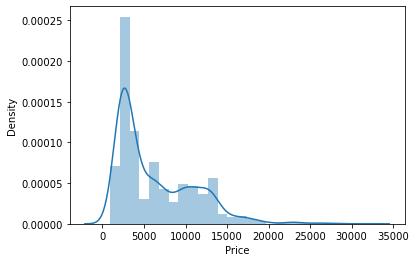

In [56]:
sns.distplot(fDF.Price)

Distribution is skewed and tails of from 15000 mark.

In [57]:
fDF.Price.skew()

1.2022392109916993

From the graph above it is observed that the Price data forms a continuous distribution with mean of 3387.12873 and tails off from  mark.

#### Analyzing the Feature Columns

In [58]:
fDF.dtypes[fDF.dtypes == 'object'] #Identifying the Categorical Columns

Airline              object
Flight Number        object
Date of Departure    object
From                 object
To                   object
Total Stops          object
Day                  object
Month                object
dtype: object

In [59]:
fDF['Airline'].value_counts()

IndiGo       750
Air India    494
Vistara      253
Go First     209
SpiceJet     134
Air Asia     109
FlyBig         2
Name: Airline, dtype: int64

### Data Visualization

<AxesSubplot:xlabel='Airline', ylabel='count'>

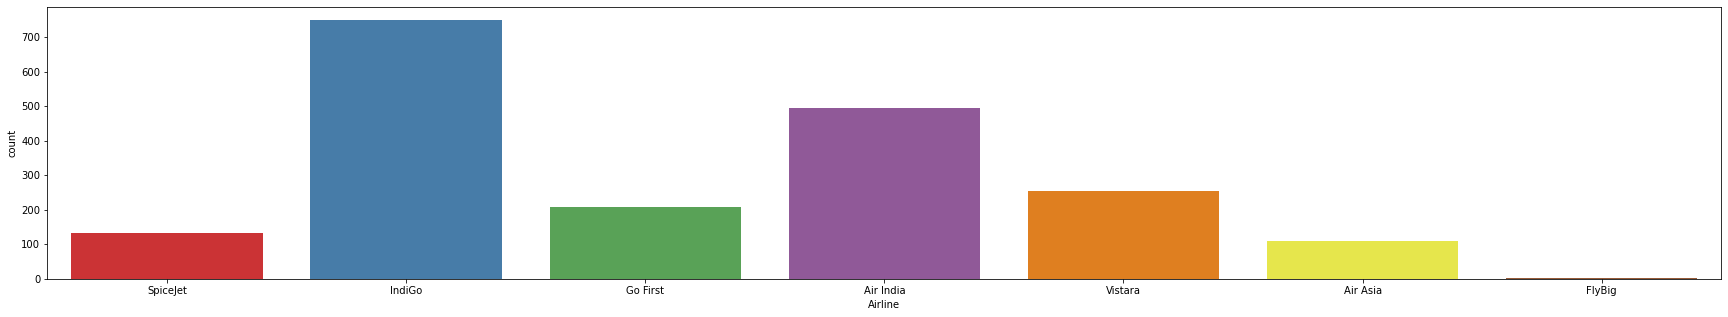

In [60]:
plt.figure(figsize=(30,5),facecolor='white')
sns.countplot(fDF['Airline'], palette="Set1")

IndiGo has the highest number of flights followed by Air India and Vistara

<AxesSubplot:xlabel='count', ylabel='From'>

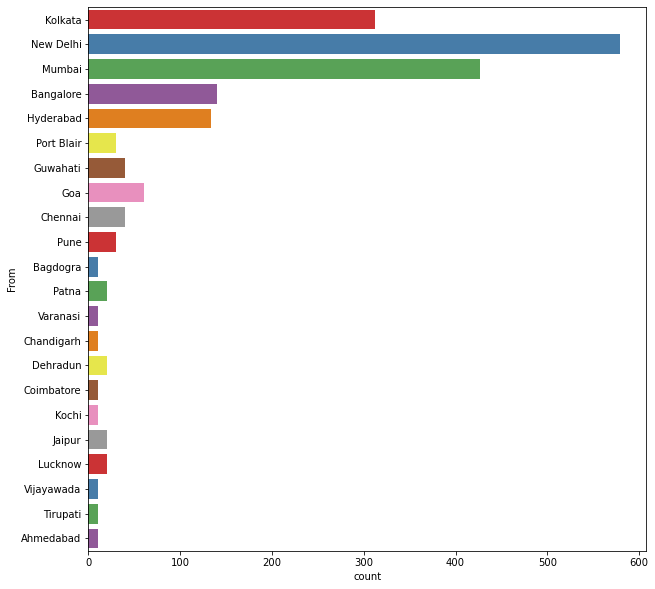

In [61]:
plt.figure(figsize=(10,10),facecolor='white')
sns.countplot(y=fDF['From'], palette="Set1")

Highest number of flights are from Delhi followed by Mumbai, Kolkata,Bangalore and Hyderabad

<AxesSubplot:xlabel='count', ylabel='To'>

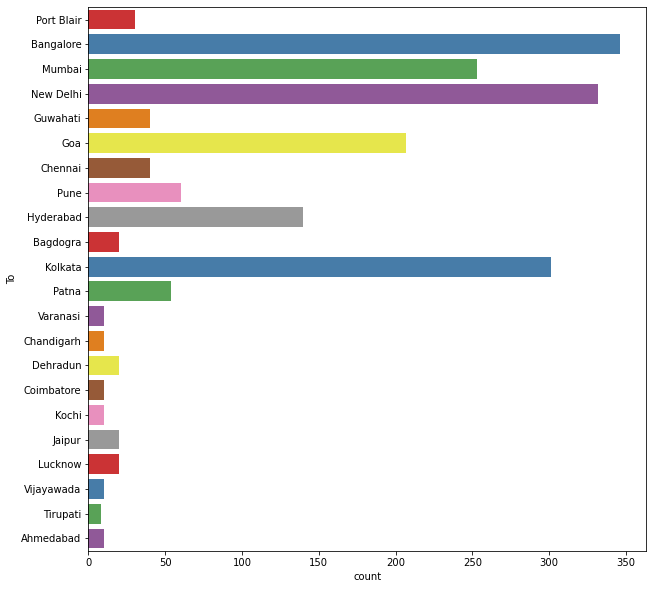

In [62]:
plt.figure(figsize=(10,10),facecolor='white')
sns.countplot(y=fDF['To'], palette="Set1")

Banglore has the most popular destination followed by New Delhi,Kolkata,Mumbai and Goa

<AxesSubplot:xlabel='Total Stops', ylabel='count'>

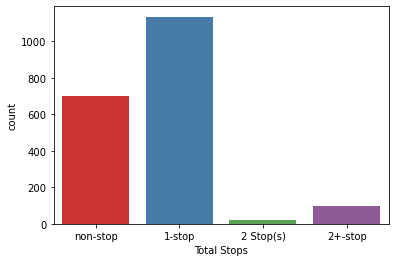

In [63]:
sns.countplot(fDF['Total Stops'], palette="Set1")

Highest number of flights have only 1 stop between source and destination while 2nd highest number of flights are non stop

### Interpreting Relationship between Independent  and Dependent Variables

#### Analyzing Relationship between Day, Month columns and Price

Text(0.5, 1.0, 'Price Trend')

<Figure size 1440x3024 with 0 Axes>

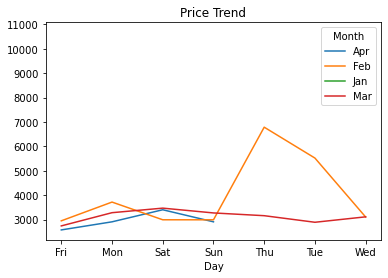

In [64]:
plt.figure(figsize=(20,42))
fDF.groupby(['Day','Month']).mean()['Price'].unstack().plot()
plt.title('Price Trend')

<AxesSubplot:xlabel='Day', ylabel='Price'>

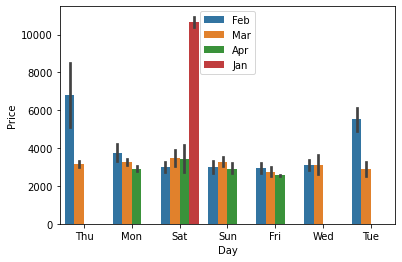

In [65]:
sns.barplot(fDF['Day'],fDF['Price'],hue=Month)

From above graphs it can be observed that on an average, there is a steady decline in Flight price from Janurary to April, with the prices being lowest in April.

From above graphs it can be observed that Flight Prices increase on an average, as the day of departure gets nearer. 

Flight Ticket prices are the highest on Thursdays,Mondays and during the Weekend on an average.

#### Analyzing Relationship between Airlines and Price

Text(0.5, 1.0, 'Price Trend')

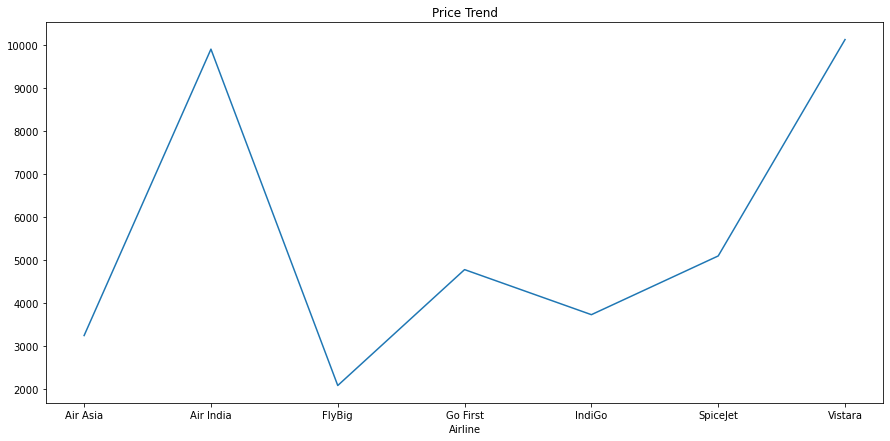

In [66]:
fig, ax = plt.subplots(figsize=(15,7))
fDF.groupby(['Airline']).mean()['Price'].plot(ax=ax)
plt.title('Price Trend')

#Airlines vs Price

Text(0.5, 1.0, 'Price Trend')

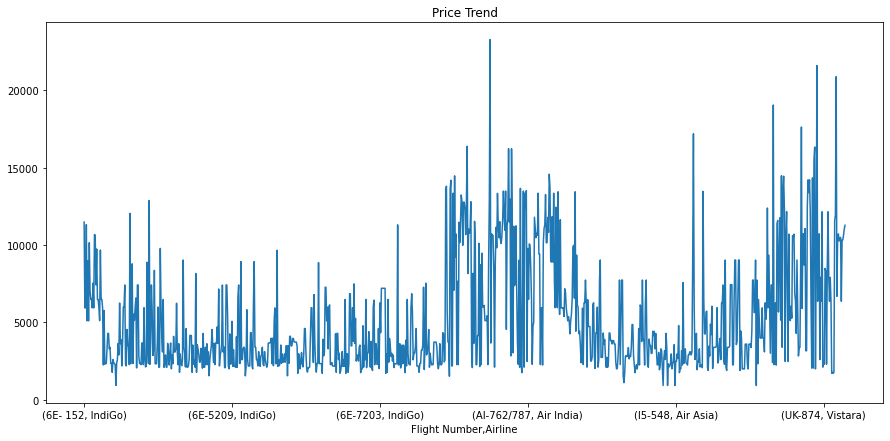

In [67]:
fig, ax = plt.subplots(figsize=(15,7))
fDF.groupby(['Flight Number','Airline'])['Price'].mean().plot(ax=ax)
plt.title('Price Trend')

# Flight numbers vs Price

FlyBig, IndiGo,SpiceJet and Air Asia offer air tickets at the most affordable prices on average, whereas Vistara, Air India are the most expensive on average.

Text(0.5, 1.0, 'Price Trend')

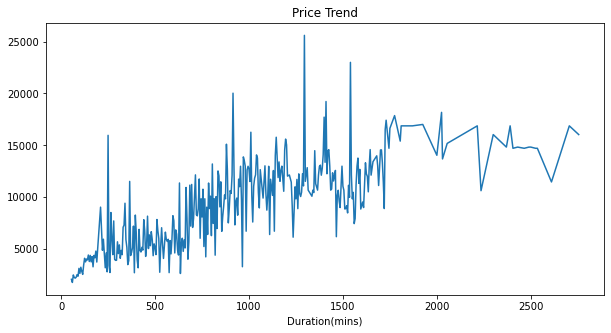

In [68]:
plt.figure(figsize=(10,5))
fDF.groupby('Duration(mins)')['Price'].mean().plot()
plt.title('Price Trend')

Text(0.5, 1.0, 'Duration vs Stops')

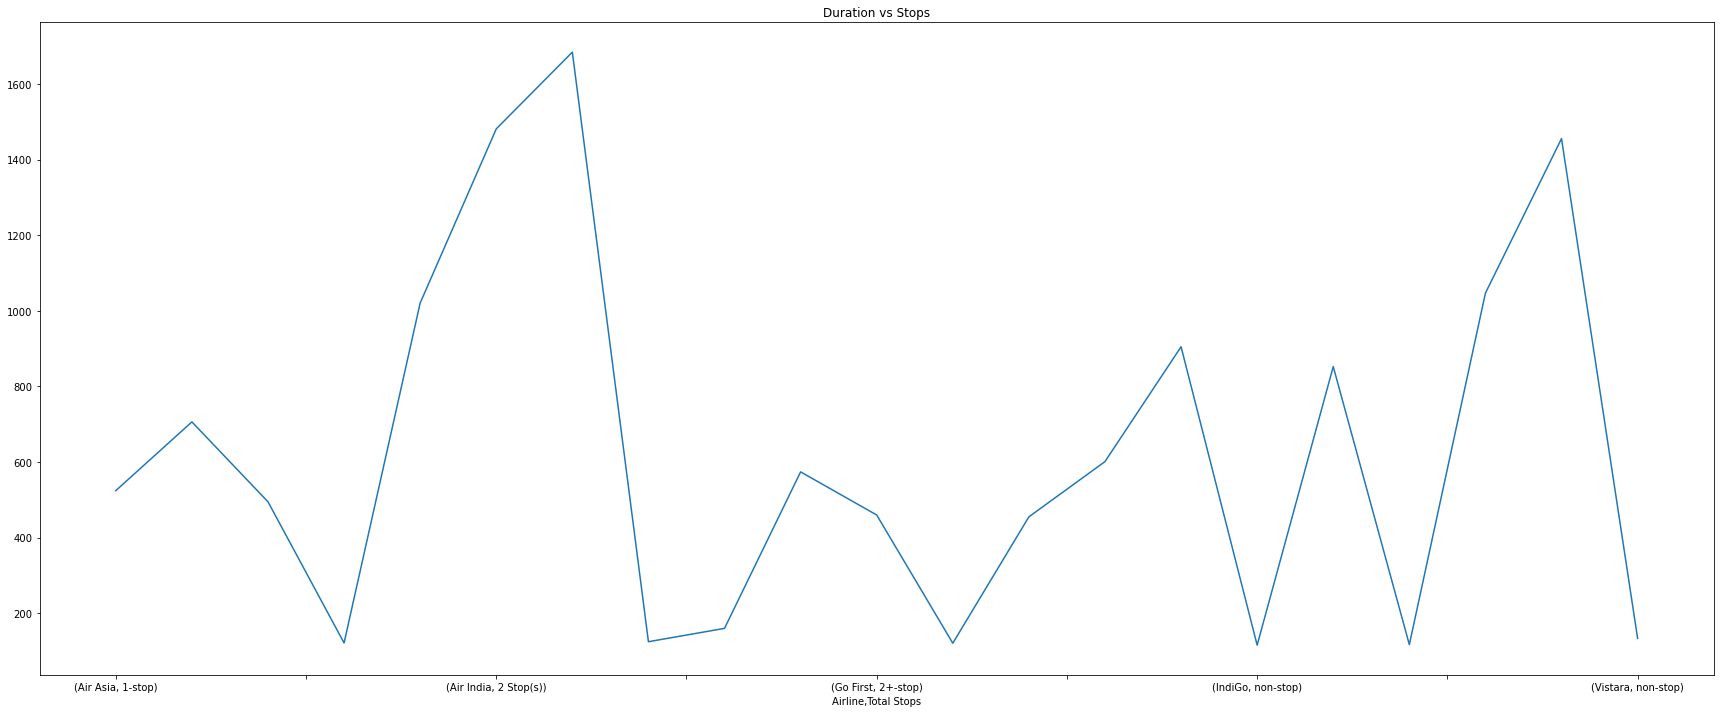

In [69]:
plt.figure(figsize=(30,12))
fDF.groupby(['Airline','Total Stops'])['Duration(mins)'].mean().plot()
plt.title('Duration vs Stops')

It can be observed that Number of Stops impact the travel time of Airlines

Text(0.5, 1.0, 'Price vs Stops')

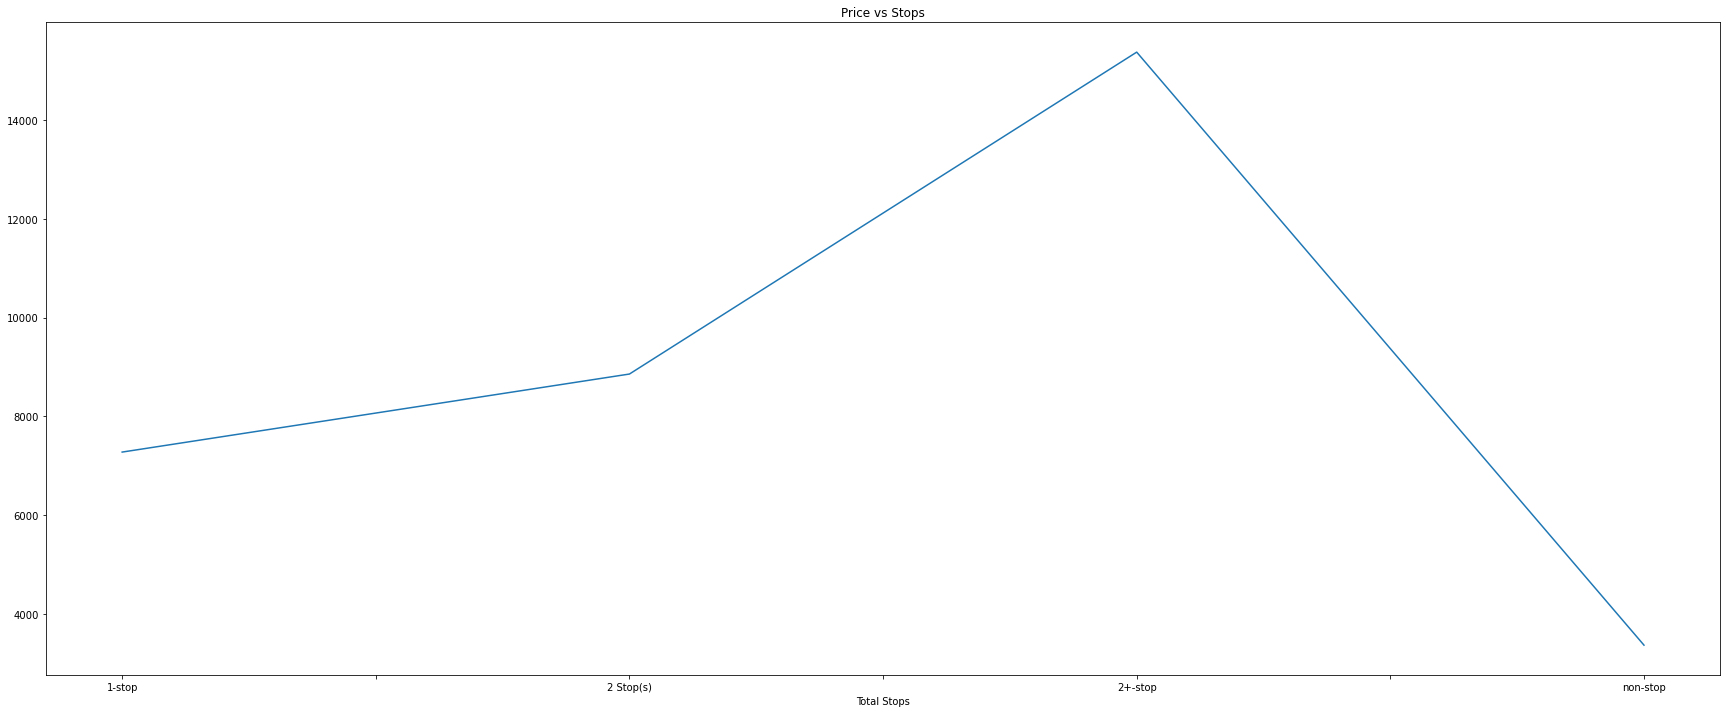

In [70]:
plt.figure(figsize=(30,12))
fDF.groupby(['Total Stops'])['Price'].mean().plot()
plt.title('Price vs Stops')

It can be observed that Number of Stops impact the Air Ticket Pricing of Airlines

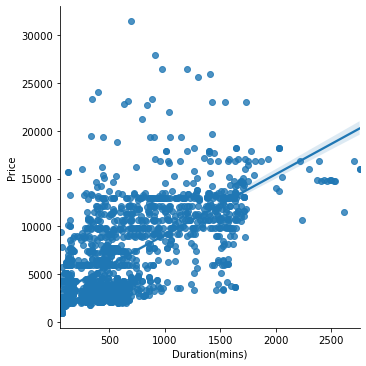

In [71]:
sns.lmplot(x="Duration(mins)", y="Price", data=fDF)

There is a linear relationship between Price and flight duration.

<AxesSubplot:xlabel='To', ylabel='Price'>

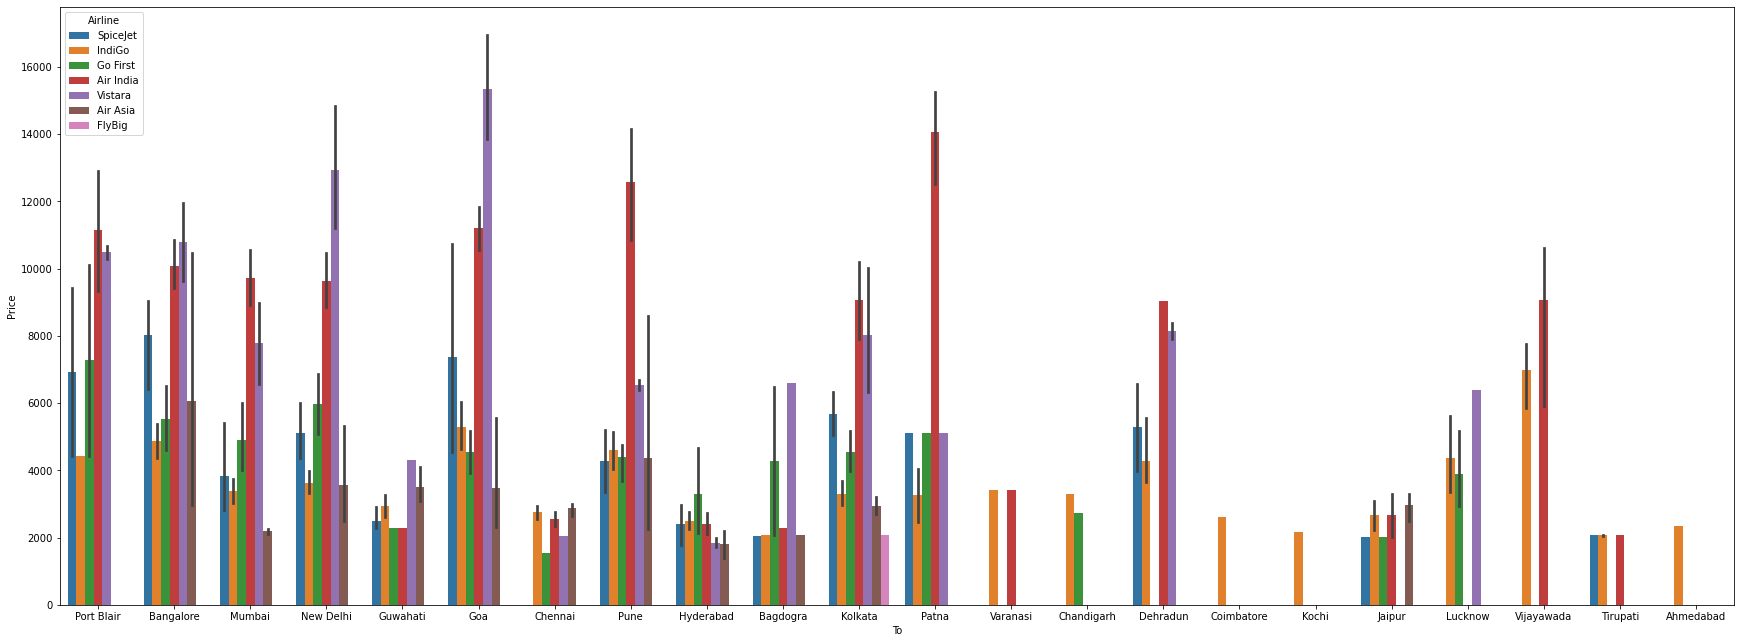

In [72]:
plt.figure(figsize=(30,11),facecolor='white')
sns.barplot(fDF['To'],fDF['Price'],hue=fDF['Airline'])

Goa,Mumbai,Pune,Bangalore,Kolakata,Port Blair,New Delhi,Patan,Dehradun,Vijaywada,Lucknow,Bagdogra are the most expensive destinations while Guwahati, Coimbatore,Jaipur,Chennai,Hyderabad,Indore,Tirupati,Ahmedabad,Chandigarh,Varanasi are the most affordable destinations

Indigo,Air Asia and Spicejet,FlyBig provide most affordable Airtickets to the destinations

### Checking for Outliers in continuous data type Features.

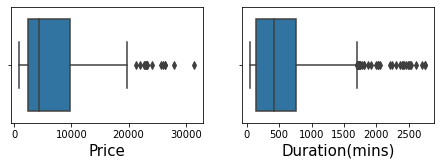

In [73]:
plt.figure(figsize=(20,20),facecolor='white')
plotnum=1
for col in fDF[['Price','Duration(mins)']]:
    if plotnum<=34:
        plt.subplot(8,5,plotnum)
        sns.boxplot(fDF[col])
        plt.xlabel(col,fontsize=15)
    plotnum+=1
plt.show()

There are outliers in all of the above columns

#### Removing Outliers using Z score Method

In [74]:
 #making a copy of the continuous data type column.
df2 =fDF[['Duration(mins)']].copy()

In [75]:
from scipy.stats import zscore
zscor = zscore(df2)
z_score_abs = np.abs(zscor)

df3 = df2[(z_score_abs < 3).all(axis=1)] #taking 3 as threshold value

In [76]:
df3.shape

(1935, 1)

In [77]:
df2.shape

(1951, 1)

##### Data loss Percentage

In [78]:
loss=(2585-2559)/2585 * 100
loss

1.0058027079303675

1% Data loss is within acceptable range

#### Using Z score method to reduce outliers since it has a low data loss %

In [79]:
dropindx = fDF.index.difference(df3.index)

In [80]:
dropindx

Int64Index([ 389, 1578, 1652, 1653, 1654, 1664, 1665, 1666, 1768, 1769, 1770,
            1771, 1772, 1773, 1774, 1775],
           dtype='int64')

In [81]:
#dropping the outliers from original features Dataframe
fDF.drop(dropindx,inplace = True) 

In [82]:
 #resetting the index of the dataframe
fDF.reset_index(drop=True,inplace = True)

In [83]:
fDF

,Airline,Flight Number,Date of Departure,From,To,Total Stops,Price,Day,Date,Month,Duration(mins)
0,SpiceJet,SG-8263,"Thu, Feb 10",Kolkata,Port Blair,non-stop,4421,Thu,10,Feb,120
1,IndiGo,6E-2106,"Thu, Feb 10",Kolkata,Port Blair,non-stop,4425,Thu,10,Feb,145
2,Go First,G8-101,"Thu, Feb 10",Kolkata,Port Blair,non-stop,4425,Thu,10,Feb,145
3,Air India,AI-787,"Thu, Feb 10",Kolkata,Port Blair,non-stop,4757,Thu,10,Feb,125
4,Air India,AI-765/549,"Thu, Feb 10",Kolkata,Port Blair,1-stop,8531,Thu,10,Feb,1055
...,...,...,...,...,...,...,...,...,...,...,...
1930,Vistara,UK-928,"Sat, Jan 29",Mumbai,Bangalore,1-stop,22848,Sat,29,Jan,630
1931,Vistara,UK-852,"Sat, Jan 29",Mumbai,Bangalore,2+-stop,22996,Sat,29,Jan,1420
1932,Vistara,UK-852,"Sat, Jan 29",Mumbai,Bangalore,2+-stop,22996,Sat,29,Jan,1730
1933,Air India,AI-675,"Sat, Jan 29",Mumbai,Bangalore,1-stop,22743,Sat,29,Jan,835


<AxesSubplot:xlabel='Duration(mins)'>

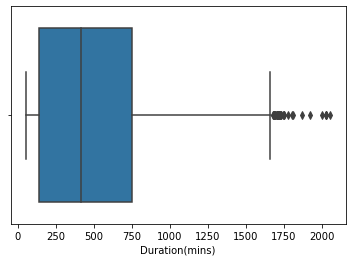

In [84]:
sns.boxplot(fDF['Duration(mins)'])

A lot of outliers have been removed.

### Checking for skewness in data distributions

In [85]:
fDF['Duration(mins)'].skew()

1.0972067006923527

#### Normalizing Data Distribution using PowerTransformer

In [86]:
from sklearn.preprocessing import PowerTransformer

In [87]:
powtrans= PowerTransformer(method='yeo-johnson', standardize=True)

In [88]:
df4 = fDF[['Duration(mins)']]

In [89]:
transformed= powtrans.fit_transform(df4)

In [90]:
type(transformed)

numpy.ndarray

In [91]:
#to convert numpy array back into dataframe
transformed = pd.DataFrame(transformed, columns=df4.columns) 

In [92]:
transformed.skew()

Duration(mins)   -0.014151
dtype: float64

In [93]:
transformed.index = fDF.index

In [94]:
fDF[['Duration(mins)']] = transformed[['Duration(mins)']]

In [95]:
fDF['Duration(mins)'].skew()

-0.014151304644671013

A lot of skewness has been removed.

### Encoding Categorical Columns

####  Encoding using get_dummies()

In [96]:
fDF

,Airline,Flight Number,Date of Departure,From,To,Total Stops,Price,Day,Date,Month,Duration(mins)
0,SpiceJet,SG-8263,"Thu, Feb 10",Kolkata,Port Blair,non-stop,4421,Thu,10,Feb,-1.111275
1,IndiGo,6E-2106,"Thu, Feb 10",Kolkata,Port Blair,non-stop,4425,Thu,10,Feb,-0.922735
2,Go First,G8-101,"Thu, Feb 10",Kolkata,Port Blair,non-stop,4425,Thu,10,Feb,-0.922735
3,Air India,AI-787,"Thu, Feb 10",Kolkata,Port Blair,non-stop,4757,Thu,10,Feb,-1.070736
4,Air India,AI-765/549,"Thu, Feb 10",Kolkata,Port Blair,1-stop,8531,Thu,10,Feb,1.143683
...,...,...,...,...,...,...,...,...,...,...,...
1930,Vistara,UK-928,"Sat, Jan 29",Mumbai,Bangalore,1-stop,22848,Sat,29,Jan,0.591524
1931,Vistara,UK-852,"Sat, Jan 29",Mumbai,Bangalore,2+-stop,22996,Sat,29,Jan,1.466740
1932,Vistara,UK-852,"Sat, Jan 29",Mumbai,Bangalore,2+-stop,22996,Sat,29,Jan,1.683420
1933,Air India,AI-675,"Sat, Jan 29",Mumbai,Bangalore,1-stop,22743,Sat,29,Jan,0.891901


In [97]:
dumm = pd.get_dummies(fDF[['Airline','Total Stops','Day','Month']],drop_first = False)

In [98]:
dumm

,Airline_Air Asia,Airline_Air India,Airline_FlyBig,Airline_Go First,Airline_IndiGo,Airline_SpiceJet,Airline_Vistara,Total Stops_1-stop,Total Stops_2 Stop(s),Total Stops_2+-stop,...,Day_Mon,Day_Sat,Day_Sun,Day_Thu,Day_Tue,Day_Wed,Month_Apr,Month_Feb,Month_Jan,Month_Mar
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1930,0,0,0,0,0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1931,0,0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
1932,0,0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
1933,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0


In [99]:
fDF = fDF.join(dumm)

In [100]:
fDF.drop(columns = ['Airline','Flight Number','Total Stops','Day','Month'],inplace=True) #Dropping the columns since they are no longer needed

In [101]:
fDF

,Date of Departure,From,To,Price,Date,Duration(mins),Airline_Air Asia,Airline_Air India,Airline_FlyBig,Airline_Go First,...,Day_Mon,Day_Sat,Day_Sun,Day_Thu,Day_Tue,Day_Wed,Month_Apr,Month_Feb,Month_Jan,Month_Mar
0,"Thu, Feb 10",Kolkata,Port Blair,4421,10,-1.111275,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,"Thu, Feb 10",Kolkata,Port Blair,4425,10,-0.922735,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,"Thu, Feb 10",Kolkata,Port Blair,4425,10,-0.922735,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
3,"Thu, Feb 10",Kolkata,Port Blair,4757,10,-1.070736,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
4,"Thu, Feb 10",Kolkata,Port Blair,8531,10,1.143683,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1930,"Sat, Jan 29",Mumbai,Bangalore,22848,29,0.591524,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1931,"Sat, Jan 29",Mumbai,Bangalore,22996,29,1.466740,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1932,"Sat, Jan 29",Mumbai,Bangalore,22996,29,1.683420,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1933,"Sat, Jan 29",Mumbai,Bangalore,22743,29,0.891901,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0


In [102]:
#dropping 'Date of Departure' column since it is no longer needed
fDF.drop(columns = ['Date of Departure'],inplace=True) 

In [103]:
fDF

,From,To,Price,Date,Duration(mins),Airline_Air Asia,Airline_Air India,Airline_FlyBig,Airline_Go First,Airline_IndiGo,...,Day_Mon,Day_Sat,Day_Sun,Day_Thu,Day_Tue,Day_Wed,Month_Apr,Month_Feb,Month_Jan,Month_Mar
0,Kolkata,Port Blair,4421,10,-1.111275,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,Kolkata,Port Blair,4425,10,-0.922735,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
2,Kolkata,Port Blair,4425,10,-0.922735,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
3,Kolkata,Port Blair,4757,10,-1.070736,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,Kolkata,Port Blair,8531,10,1.143683,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1930,Mumbai,Bangalore,22848,29,0.591524,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1931,Mumbai,Bangalore,22996,29,1.466740,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1932,Mumbai,Bangalore,22996,29,1.683420,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1933,Mumbai,Bangalore,22743,29,0.891901,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0


#### Encoding Columns 'From' and 'To' using Label Encoder

In [104]:
from sklearn.preprocessing import LabelEncoder

In [105]:
labenc = LabelEncoder()

In [106]:
for col in fDF[['From','To']]:
    fDF[col] = labenc.fit_transform(fDF[col])

In [107]:
fDF

,From,To,Price,Date,Duration(mins),Airline_Air Asia,Airline_Air India,Airline_FlyBig,Airline_Go First,Airline_IndiGo,...,Day_Mon,Day_Sat,Day_Sun,Day_Thu,Day_Tue,Day_Wed,Month_Apr,Month_Feb,Month_Jan,Month_Mar
0,12,17,4421,10,-1.111275,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,12,17,4425,10,-0.922735,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
2,12,17,4425,10,-0.922735,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
3,12,17,4757,10,-1.070736,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,12,17,8531,10,1.143683,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1930,14,2,22848,29,0.591524,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1931,14,2,22996,29,1.466740,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1932,14,2,22996,29,1.683420,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1933,14,2,22743,29,0.891901,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0


### Finding Correlation 

In [108]:
f_corr =fDF.corr()

In [109]:
f_corr

,From,To,Price,Date,Duration(mins),Airline_Air Asia,Airline_Air India,Airline_FlyBig,Airline_Go First,Airline_IndiGo,...,Day_Mon,Day_Sat,Day_Sun,Day_Thu,Day_Tue,Day_Wed,Month_Apr,Month_Feb,Month_Jan,Month_Mar
From,1.000000,-0.119630,0.388806,0.356472,0.210191,-0.219918,0.234109,-0.030401,-0.030926,-0.161355,...,-0.134785,0.292682,-0.034034,-0.054551,-0.111261,-0.164584,-0.061342,-0.382316,0.435385,-0.060912
To,-0.119630,1.000000,-0.012616,-0.058156,-0.027870,-0.015694,0.046940,0.011714,0.049295,-0.070258,...,-0.116215,-0.076536,0.030677,0.065458,0.028054,0.091798,0.029283,0.091814,-0.042277,-0.061730
Price,0.388806,-0.012616,1.000000,0.536849,0.654338,-0.160412,0.441965,-0.029340,-0.111069,-0.437360,...,-0.132896,0.617387,-0.259366,-0.148805,-0.091358,-0.225696,-0.177373,-0.344877,0.774017,-0.410709
Date,0.356472,-0.058156,0.536849,1.000000,0.353085,-0.072166,0.305303,-0.011322,-0.145477,-0.223219,...,-0.064907,0.672694,-0.106209,-0.172796,-0.345696,-0.379577,-0.245353,-0.361143,0.728849,-0.308506
Duration(mins),0.210191,-0.027870,0.654338,0.353085,1.000000,-0.148814,0.337871,-0.026506,-0.070925,-0.269624,...,0.025696,0.352787,-0.196388,-0.060109,-0.039931,-0.145571,-0.124034,-0.193082,0.461062,-0.247419
Airline_Air Asia,-0.219918,-0.015694,-0.160412,-0.072166,-0.148814,1.000000,-0.139942,-0.007859,-0.085019,-0.194372,...,0.148271,-0.154284,0.125673,0.054906,-0.038340,-0.020359,0.063419,0.083191,-0.165028,0.064256
Airline_Air India,0.234109,0.046940,0.441965,0.305303,0.337871,-0.139942,1.000000,-0.018424,-0.199314,-0.455675,...,-0.098055,0.331612,-0.150092,-0.062977,-0.085828,-0.100410,-0.091542,-0.206218,0.442619,-0.230990
Airline_FlyBig,-0.030401,0.011714,-0.029340,-0.011322,-0.026506,-0.007859,-0.018424,1.000000,-0.011193,-0.025590,...,-0.007104,-0.032116,0.036689,0.050819,-0.008597,-0.010614,0.060576,-0.019987,-0.025954,0.016781
Airline_Go First,-0.030926,0.049295,-0.111069,-0.145477,-0.070925,-0.085019,-0.199314,-0.011193,1.000000,-0.276837,...,0.065456,-0.097694,0.040801,0.023650,0.060518,0.064222,0.041145,0.080902,-0.100204,0.006891
Airline_IndiGo,-0.161355,-0.070258,-0.437360,-0.223219,-0.269624,-0.194372,-0.455675,-0.025590,-0.276837,1.000000,...,0.015697,-0.274560,0.080378,0.070847,0.025515,0.129598,0.041624,0.120879,-0.368417,0.261894


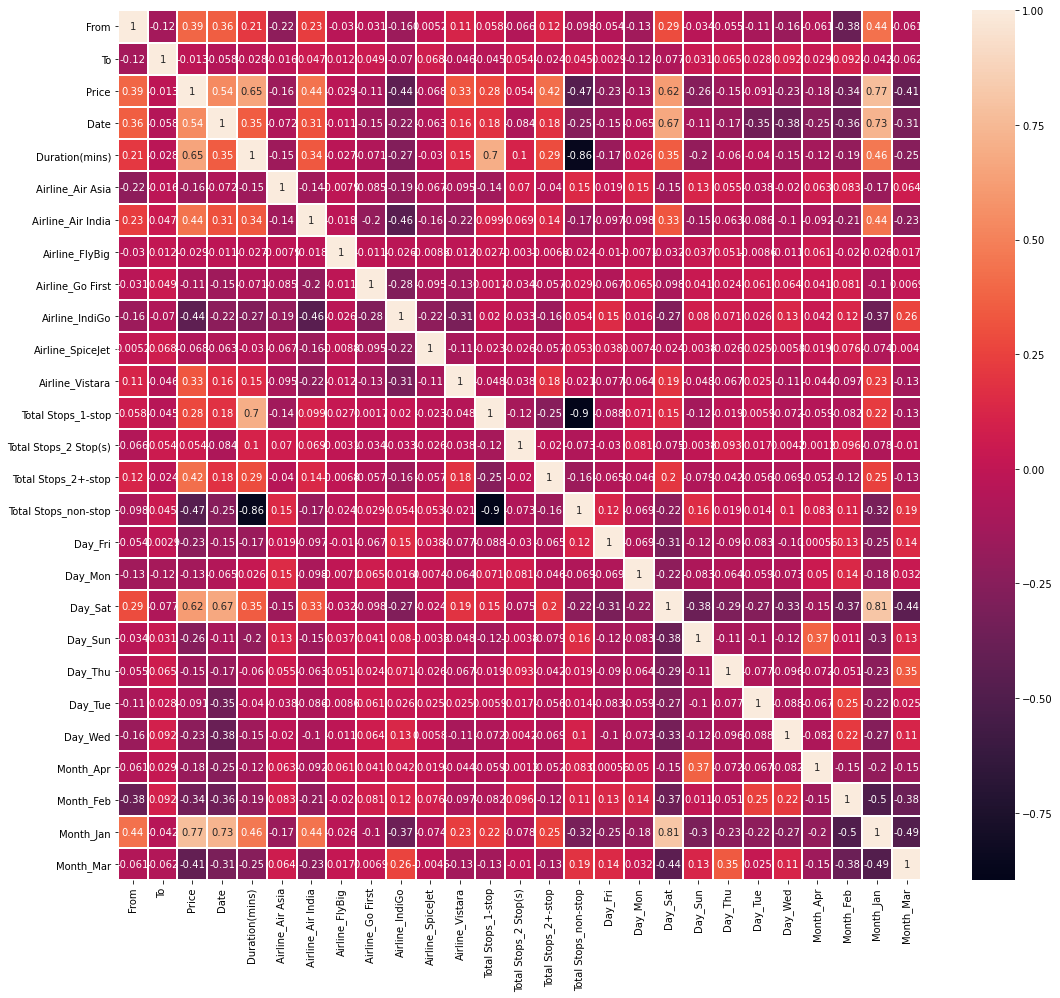

In [110]:
plt.figure(figsize=(18,16))
sns.heatmap(f_corr,annot=True,linewidth=1)
plt.show()

### Visualizing correlation of feature columns with label column.

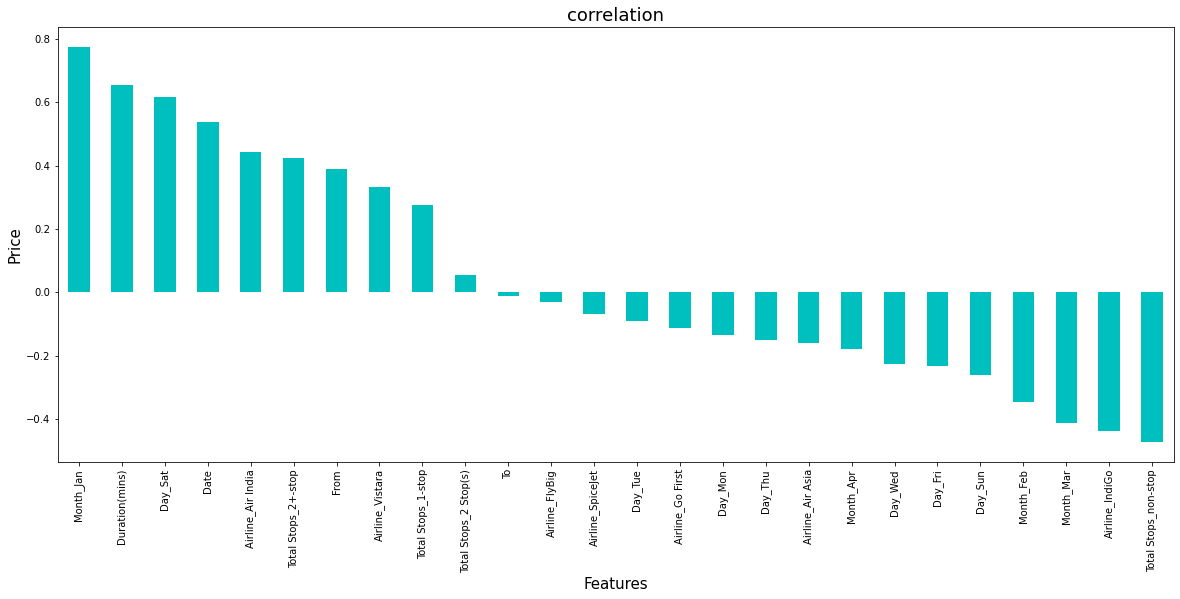

In [111]:
plt.figure(figsize = (20,8))
fDF.corr()['Price'].sort_values(ascending = False).drop(['Price']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

It is observed that Month_Jan, Duration(mins),Airline_Air India ,Total Stops_2+-stop,Date,Day_Sat and From have the highest positive correlation with Price, while Date,Total Stops_non-stop,Month_Mar,Month_Feb,Airline_IndiGo have the highest negative correlation with Price

### Feature Selection

In [112]:
from sklearn.preprocessing import StandardScaler

In [113]:
X = fDF.drop(columns = ['Price'])
y = fDF['Price']

In [114]:
scaler= StandardScaler()
scaled_X = scaler.fit_transform(X)

### Checking for Multicollinearity using Variance Inflation Factor

In [115]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [116]:
vif = pd.DataFrame()

In [117]:
vif["Features"] = X.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]

In [118]:
vif

,Features,vif
0,From,1.423552
1,To,1.085827
2,Date,3.072955
3,Duration(mins),6.281558
4,Airline_Air Asia,inf
5,Airline_Air India,inf
6,Airline_FlyBig,inf
7,Airline_Go First,inf
8,Airline_IndiGo,inf
9,Airline_SpiceJet,inf


MultiCollinearity exists amongst many columns, Based on ANOVA F scores, columns scoring the lowest will be dropped.

### Selecting Kbest Features

In [119]:
from sklearn.feature_selection import SelectKBest, f_classif

In [120]:
bestfeat = SelectKBest(score_func = f_classif, k = 'all')
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [121]:
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(30,'Score'))

                  Feature       Score
6          Airline_FlyBig         inf
24              Month_Jan  635.119380
0                    From  114.566553
1                      To   31.821292
13    Total Stops_2+-stop   22.490455
9        Airline_SpiceJet   22.409583
17                Day_Sat   21.945666
3          Duration(mins)   15.362430
2                    Date   14.754519
7        Airline_Go First   11.956120
23              Month_Feb   10.563910
14   Total Stops_non-stop   10.322733
15                Day_Fri   10.196457
11     Total Stops_1-stop    9.820610
21                Day_Wed    8.505183
25              Month_Mar    8.475502
8          Airline_IndiGo    8.403092
18                Day_Sun    8.285449
5       Airline_Air India    8.241533
12  Total Stops_2 Stop(s)    7.503374
16                Day_Mon    7.107034
10        Airline_Vistara    7.095953
19                Day_Thu    6.250651
4        Airline_Air Asia    6.230682
20                Day_Tue    5.775022
22          

#### Selecting best features based on their scores:

In [122]:
x_best = X.drop(columns=['Airline_FlyBig']).copy()

In [123]:
scaled_x_best = scaler.fit_transform(x_best)

### This is a Regression Problem since Target/ Label column ('Price') has Continuous type of Data.


## Regression Model Building

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
from sklearn.metrics import r2_score

#### Finding the Best Random State

In [126]:
from sklearn.linear_model import LinearRegression
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(scaled_x_best,y,test_size = .25, random_state = i)
    modlr =  LinearRegression()
    modlr.fit(x_train,y_train)
    pred = modlr.predict(x_test)
    acc  = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.8313549087656166 on random_state: 83


In [127]:
from sklearn.ensemble import RandomForestRegressor
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(scaled_x_best,y,test_size = .25, random_state = i)
    modRF =  RandomForestRegressor()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.915173132472865 on random_state: 7


In [128]:
x_train,x_test,y_train,y_test = train_test_split(scaled_x_best,y,test_size = .25, random_state =7)

In [129]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR



In [130]:
from sklearn.metrics import r2_score,mean_squared_error

In [131]:
rf = RandomForestRegressor()
dt = DecisionTreeRegressor()
xg = XGBRegressor()
SV= SVR()
r=Ridge()
LR = LinearRegression()

### Training the Models

In [132]:
rf.fit(x_train,y_train)
xg.fit(x_train,y_train)
SV.fit(x_train,y_train)
r.fit(x_train,y_train)
dt.fit(x_train,y_train)
LR.fit(x_train,y_train)

LinearRegression()

All models have been trained.

### Linear Regression Model

####  R2 Score

In [133]:
y_lr_pred = LR.predict(x_test)

In [134]:
r2_score(y_test,y_lr_pred)

0.8169229713289812

### Mean Squared Error

In [135]:
mean_squared_error(y_test,y_lr_pred)

3325014.3257155647

#### Root Mean Squared Error

In [136]:
np.sqrt(mean_squared_error(y_test,y_lr_pred))

1823.4621810488873

### Ridge Regression Model

In [137]:
y_r_pred = r.predict(x_test)

####  R2 Score

In [138]:
r2_score(y_test,y_r_pred)

0.8173852481899222

#### Mean Squared Error 

In [139]:
mean_squared_error(y_test,y_r_pred)

3316618.5308076316

#### Root Mean Squared Error

In [140]:
np.sqrt(mean_squared_error(y_test,y_r_pred))

1821.1585682766977

###  Random Forest Regression Model

In [141]:
y_rf_pred = rf.predict(x_test)

#### R2 Score

In [142]:
r2_score(y_test,y_rf_pred)

0.9165554162823101

#### Mean Squared Error

In [143]:
mean_squared_error(y_test,y_rf_pred)

1515506.5508697107

#### Root Mean Squared Error

In [144]:
np.sqrt(mean_squared_error(y_test,y_rf_pred))

1231.0591175364857

### XGB Regression Model 

In [145]:
y_xg_pred = xg.predict(x_test)

####  R2 Score

In [146]:
r2_score(y_test,y_xg_pred)

0.8972897393090901

#### Mean Squared Error

In [147]:
mean_squared_error(y_test,y_xg_pred)

1865406.548677057

#### Root Mean Squared Error

In [148]:
np.sqrt(mean_squared_error(y_test,y_xg_pred))

1365.798868310066

### Support Vector Regression Model

In [149]:
y_svr_pred = SV.predict(x_test)

####  R2 Score

In [150]:
r2_score(y_test,y_svr_pred)

-0.09689193378406236

#### Mean Squared Error

In [151]:
mean_squared_error(y_test,y_svr_pred)

19921567.550387096

#### Root Mean Squared Error

In [152]:
np.sqrt(mean_squared_error(y_test,y_svr_pred))

4463.358326460816

###  Decision Tree Regression Model

In [153]:
y_dt_pred = dt.predict(x_test)

####  R2 Score

In [154]:
r2_score(y_test,y_dt_pred)

0.8543941953945315

#### Mean Squared Error

In [155]:
mean_squared_error(y_test,y_dt_pred)

2644468.2314049588

#### Root Mean Squared Error

In [156]:
np.sqrt(mean_squared_error(y_test,y_dt_pred))

1626.182102780915

### Model Cross Validation

In [157]:
from sklearn.model_selection import ShuffleSplit,cross_val_score

#### Linear Regression

In [158]:
cross_val_score(LR,scaled_x_best,y,cv=ShuffleSplit(5)).mean()

0.7888702841471833

#### Ridge Regression

In [159]:
cross_val_score(r,scaled_x_best,y,cv=ShuffleSplit(5)).mean()

0.7358230822340681

#### Random Forest Regression

In [160]:
cross_val_score(rf,scaled_x_best,y,cv=ShuffleSplit(5)).mean()

0.8635798232923874

#### XGB Regression

In [161]:
cross_val_score(xg,scaled_x_best,y,cv=ShuffleSplit(5)).mean()

0.8370097925969702

#### SV Regression

In [162]:
cross_val_score(SV,scaled_x_best,y,cv=ShuffleSplit(5)).mean()

-0.09501137109431937

#### Decision Tree Regression

In [163]:
cross_val_score(dt,scaled_x_best,y,cv=ShuffleSplit(5)).mean()

0.7655915909661996

### Based on comparing Accuracy Score results with Cross Validation results, it is determined that Random Forest Regressor is the best model. It also has the lowest Root Mean Squared Error score

### Hyper Parameter Tuning

In [164]:
from sklearn.model_selection import GridSearchCV

In [165]:
parameter = {'n_estimators':[30,60,80],'max_depth': [40,50,80],'min_samples_leaf':[5,10,20],
             'min_samples_split':[2,5,10],'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}

In [166]:
GridCV = GridSearchCV(RandomForestRegressor(),parameter,cv=ShuffleSplit(5),n_jobs = -1,verbose = 1)

In [167]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=None, test_size=None, train_size=None),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [40, 50, 80],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [30, 60, 80]},
             verbose=1)

In [168]:
GridCV.best_params_

{'criterion': 'mae',
 'max_depth': 80,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 30}

In [169]:
Best_mod = RandomForestRegressor(n_estimators = 80,criterion = 'mse', max_depth= 80,
                                 max_features = 'auto',min_samples_leaf = 5, min_samples_split = 2)

Best_mod.fit(x_train,y_train)

RandomForestRegressor(max_depth=80, min_samples_leaf=5, n_estimators=80)

In [170]:
rfpred = Best_mod.predict(x_test)
acc = r2_score(y_test,rfpred)
print(acc*100)

90.25988301629393


##### Random Forest Regressor has an accuracy of 91.69

#### Saving The Model

In [171]:
import joblib
joblib.dump(Best_mod,"BestPriceModel.pkl")

['BestPriceModel.pkl']

#### Loading The Model

In [172]:
mod=joblib.load("BestPriceModel.pkl")

In [173]:
print(mod.predict(scaled_x_best))

[ 4367.01858118  5518.60068295  5727.48438517 ... 16641.19435625
 13089.21725888 16517.18843776]


In [174]:
Prediction_accuracy = pd.DataFrame({'Predictions': mod.predict(scaled_x_best), 'Actual Values': y})
Prediction_accuracy.head(30)

,Predictions,Actual Values
0,4367.018581,4421
1,5518.600683,4425
2,5727.484385,4425
3,4253.047127,4757
4,9634.642273,8531
5,5399.955982,10059
6,12179.416213,13360
7,12218.383289,13493
8,12218.383289,13629
9,11454.600865,13808


### Conclusion

      Actual Values   Predictions
1413           8790   7716.639883
887            3486   3806.670503
870            2104   2773.219445
1787           8589   8307.885883
867            2104   2487.384307
...             ...           ...
699            3599   3884.465839
1676           5955   8060.539766
1139           3624   3085.043287
1681           6060   9158.362776
1240          11900  11940.367552

[484 rows x 2 columns]


Text(0.5, 1.0, 'Random Forest Regessor')

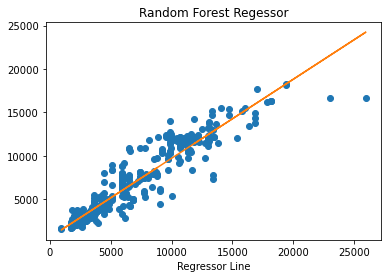

In [175]:
res=pd.DataFrame()
res['Actual Values']=y_test
res['Predictions']=Best_mod.predict(x_test)

print(res)

x=np.array(y_test)
y=np.array(Best_mod.predict(x_test))

plt.plot(x,y,'o')

m,b=np.polyfit(x,y,1)

plt.plot(x,m*x+b)
plt.xlabel('Regressor Line')
plt.title('Random Forest Regessor')